# 2 номер

In [2]:
!pip install gekko
from gekko import GEKKO
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy.optimize import minimize
from math import cos

 ----------------------------------------------------------------
 APMonitor, Version 0.9.2
 APMonitor Optimization Suite
 ----------------------------------------------------------------
 
 
 --------- APM Model Size ------------
 Each time step contains
   Objects      :  0
   Constants    :  0
   Variables    :  5
   Intermediates:  0
   Connections  :  0
   Equations    :  4
   Residuals    :  4
 
 Number of state variables:    700
 Number of total equations: -  600
 Number of slack variables: -  0
 ---------------------------------------
 Degrees of freedom       :    100
 
 **********************************************
 Dynamic Control with Interior Point Solver
 **********************************************
  
  
 Info: Exact Hessian

******************************************************************************
This program contains Ipopt, a library for large-scale nonlinear optimization.
 Ipopt is released as open source code under the Eclipse Public License (EPL).
         

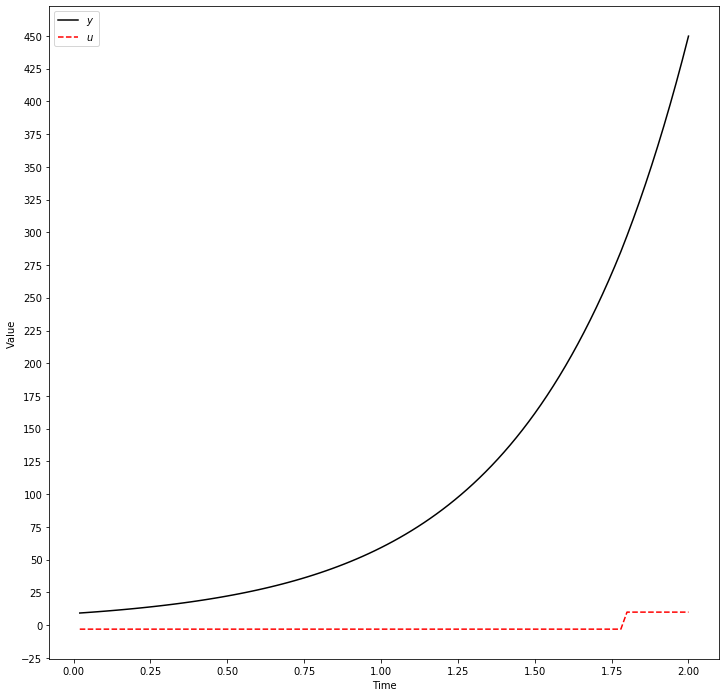

<Figure size 432x288 with 0 Axes>

In [4]:
# Задача решена с помощью пакета GEKKO
# Численным методом был найден минимум функционала, равный 4.24081421245
# минимум успешно найден
# Инициализируем модель
m = GEKKO(remote=False)
nt = 101
m.time = np.linspace(0,2,nt)
a1 = 9
a3 = 2
b1 = 19 
b2 = 6
c1 = 3 
c2 = 10
# Задаём переменные
y = m.Var(value = a1) # y(0)= a1 по условию в начальной точке
z = m.Var(value=5) 
u = m.Var(value=0, lb = -c1, ub = c2) # ограничения на u
t = m.Var(value=0)
p = np.zeros(nt)    # Отмечаем последнюю точку
p[-1] = 1.0
final = m.Param(value=p)
# Задаём уравнения

m.Equation(y.dt()== a3 * y + u)
m.Equation(z.dt()== b1 * y - b2 * u )
m.Equation(t.dt() == 1)
m.Obj(z * final)    # Целевая функция
m.options.IMODE = 6 # 6 -- задача оптимального управления/динамического программирования
m.solve(disp=True)

# Рисуем получившееся решение
plt.figure(figsize=(12,12))
plt.plot(m.time[1:], y.value[1:], 'k-', label=r'$y$')
plt.plot(m.time[1:],u.value[1:],'r--',label=r'$u$')
plt.legend(loc='best')
plt.locator_params(axis='y', nbins=20)
plt.xlabel('Time')
plt.ylabel('Value')
plt.show()
plt.savefig('2 задача.jpg')

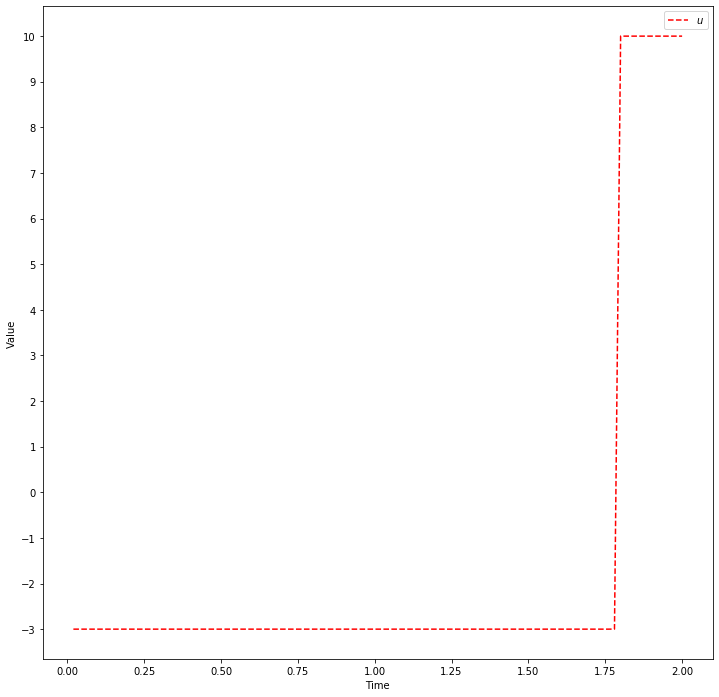

<Figure size 432x288 with 0 Axes>

In [5]:
# отдельный график для переменной управления
# здесь видно, что u находится в нужных границах
plt.figure(figsize=(12,12))
plt.plot(m.time[1:],u.value[1:],'r--',label=r'$u$')
plt.legend(loc='best')
plt.locator_params(axis='y', nbins=20)
plt.xlabel('Time')
plt.ylabel('Value')
plt.show()
plt.savefig('2 задача(1).jpg')